# Морфология 2
В данном ноутбуке находится задание на триграммы и словарь. В качестве текста будем использовать томик войны и мира: https://goo.gl/qcVTLE 

Для начала напомним некоторые полезные инструменты на питоне

## 1. Инструменты

### 1.1. Регулярные выражения
Исчерпывающий пост https://habr.com/ru/post/349860/

In [2]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print('Находим числа в строке: ', numbers)

print('Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print('Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))

# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.

Находим числа в строке:  ['49', '432']
Простенький токенизатор:  ['How', 'to', 'split', 'text']
Еще один токенизатор:  ['How', 'to', 'split', 'text', 'Again']


In [3]:
print('Русский токенизатор: ', re.findall(r'[А-Яа-яёЁ]+', 'Пример русского teksta'))

Русский токенизатор:  ['Пример', 'русского']


### 1.2. Чтение файлов
Чтобы не мучится самим с кодировками, приведем способ чтения файла корпуса.

In [4]:
import io
wordlist = None
with io.open('./wp.txt', "r") as text_file:
    text = text_file.read().lower()
    wordlist = re.findall(r'[а-яё]+', text)

### 1.3. ООП
В питоне можно создавать свои классы, скорее всего нам понадобится класс для хранения бора

In [15]:
class Node:
    def __init__(self):
        self.count = 0
        self.children = dict()
    
class Tree:
    def __init__(self):
        self.root = Node()
        
    def insert(self, word):
        curr_node = self.root
        for c in word:
            if c in curr_node.children.keys():
                curr_node.children[c].count += 1
            else:
                curr_node.children[c] = Node()
            curr_node = curr_node.children[c]

    def best_ext(self, word, ext_len):
        end_node = self.root
        for c in word:
            if c not in end_node.children.keys():
                return word
            end_node = end_node.children[c]
        ext, _ = self.__best_path(end_node, ext_len)
        return word + ext
    
    def __best_path(self, node, path_len):
        if path_len == 0:
            return "", node.count
        best_sum = 0
        best_ext = ""
        for char, child in node.children.items():
            ext, ext_sum = self.__best_path(child, path_len - 1)
            if ext_sum > best_sum:
                best_sum = ext_sum + node.count
                best_ext = char + ext
        return best_ext, best_sum
    
def build_tree(wordlist):
    tree = Tree()
    for word in wordlist:
        tree.insert(word)
    return tree

tree = build_tree(wordlist)

### 1.4. pyplot
Довольно часто приходится построить какие-нибудт графики и гистограммы для изучения данных, с которыми придется работать. Для этого в питоне есть удобнейший модуль для этого - pyplot. Туториал: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

In [6]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline 

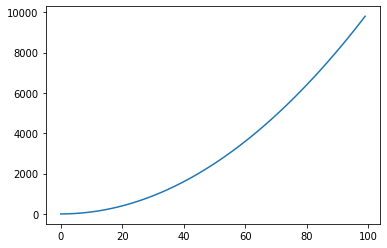

In [7]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <a list of 10 Patch objects>)

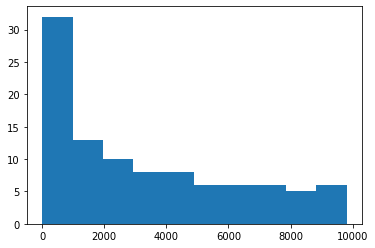

In [8]:
# и распределение по значениям
plt.hist(data)

Также полезная команда для подсчета времения выполнеия в ячейке

In [9]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

CPU times: user 8.19 s, sys: 8.52 ms, total: 8.2 s
Wall time: 8.21 s


## 2. Задание
Собственно теперь нам потребуется написать подсчет триграмм и бор для словаря, чтобы реализовать простенькую систему исправления ошибок.

### 2.1. Триграммы
Для начала получим словарь триграмма - её кол-во в тексте, не забывая о начале и конце слова.

Далее можно построить гистограмму на кол-во вхождений триграмм, и посмотреть самые частые и какая частота у каких-нибудь заведомо странных, например: 'чгк', 'шкя' и подобные. Из полученных данных придумать эвристику, как считать слово с опечаткой. Проверить эвристику по словарю.

In [10]:
from collections import Counter, defaultdict

def corpus_trigrams(word_list):
    '''returns trigrams count dictionary'''
    trigrams = []
    for word in word_list:
        padded = f'##{word}##'
        trigrams.extend([padded[i:i+3] for i in range(len(padded) - 2)])
    return Counter(trigrams)

trigrams_freq = corpus_trigrams(wordlist)

(array([6.147e+03, 4.000e+01, 1.500e+01, 9.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.37210e+03, 2.74320e+03, 4.11430e+03, 5.48540e+03,
        6.85650e+03, 8.22760e+03, 9.59870e+03, 1.09698e+04, 1.23409e+04,
        1.37120e+04]),
 <a list of 10 Patch objects>)

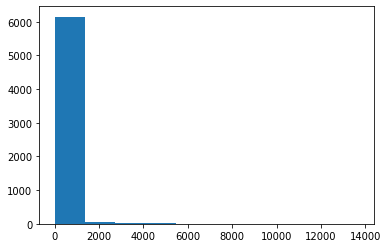

In [11]:
plt.hist(trigrams_freq.values())

In [12]:
print(trigrams_freq['чгк'])
print(trigrams_freq['шкя'])
print(len(list(filter(lambda v: v == 1, trigrams_freq.values()))) / len(trigrams_freq))

0
0
0.13158740359897173


In [38]:
# Эвристика - если встречаем хотя бы 2 триграммы, которые больше нигде не встречаются, считаем слово ошибочным
def is_error(word):
    '''is the word with mistake'''
    padded_word = f'##{word}##'
    count_susp = 0
    word_trigrams = [padded_word[i:i+3] for i in range(len(padded_word) - 2)]
    for t in word_trigrams:
        if trigrams_freq[t] <= 1:
            count_susp += 1
            if count_susp == 2:
                return True
    return False

In [39]:
error_list = []
without_errors = []
for word in wordlist:
    if is_error(word):
        error_list.append(word)
    else:
        without_errors.append(word)
print(error_list)

['июле', 'отжившим', 'гаугвицу', 'монморанси', 'иерархии', 'ростбиф', 'нимфы', 'геральдических', 'злоупотребления', 'эманципации', 'яффе', 'свяжи', 'июньская', 'бесхарактерными', 'бретёр', 'радзивилов', 'камчатные', 'паузе', 'жанлис', 'взъерошивая', 'яхонтовые', 'экземпляр', 'ъ', 'знаэ', 'манифэ', 'можэ', 'смотрэт', 'бэ', 'зачэм', 'поощрением', 'послэ', 'умэ', 'рэ', 'своэ', 'всэ', 'будэ', 'напыщенно', 'настоящэ', 'человэк', 'вежливостью', 'шкапчиков', 'всём', 'онуфриичем', 'толще', 'алгебры', 'поэзии', 'свежо', 'дюссековой', 'одынцова', 'сафьяном', 'эдак', 'шнапс', 'йорк', 'холопского', 'слёз', 'бакенбардами', 'кааак', 'кроатов', 'рявкнул', 'федешоу', 'пляшущего', 'фараон', 'зашибся', 'фуфайке', 'чикчиры', 'доппелькюмелем', 'полуулыбаясь', 'мундштука', 'лямку', 'ламбахе', 'амштетене', 'ямщику', 'циркуляр', 'врбна', 'лихтенфельс', 'лш', 'маршрутов', 'ауэсперг', 'дилемма', 'эцельсдорфа', 'шлюхой', 'вьюки', 'шрама', 'четырехтысячный', 'алмазным', 'каптенармус', 'эшелонами', 'лемарруа', 'п

### 2.2. Бор
Далее построим бор, с помощью которого будем искать исправления опечатки в слове. Пока только в случае замены и удаления в конце (Если есть желание, то можно и для всех случаев). Также сравнить по времени с поиском в случае замены в исходном слове последних двух символов и поиске в словаре.

In [41]:
def correct_word(word):
    '''returns most similar word from dictionary'''
    if len(word) <= 2:
        return word
    return tree.best_ext(word[:-2], 2)
    
def correct_word_naive(word):
    '''correct word using generation'''
    alphabet = list(range(ord('а'), ord('я') + 1))
    for c1 in alphabet:
        for c2 in alphabet:
            ext_word = word[:-2] + chr(c1) + chr(c2)
            if ext_word in without_errors:
                return ext_word
    return word

In [43]:
%%time
print(correct_word('человэк'))
print(correct_word('зачэм'))

человек
зачем
CPU times: user 289 µs, sys: 152 µs, total: 441 µs
Wall time: 345 µs


In [45]:
%%time
print(correct_word_naive('человэк'))
print(correct_word_naive('зачэм'))

человек
зачем
CPU times: user 448 ms, sys: 2.74 ms, total: 450 ms
Wall time: 450 ms


### 2.3 Все вместе
Теперь соберем поиск и исправление опечаток в одну систему, которая будет принимать текст и править его. Также замерим скорость по сравнению с "менее наивным подходом".

In [47]:
def correct_mistakes(text):
    '''returns corrected text'''
    word_list = re.findall(r'[а-яё]+', text.lower())
    corrected_text = []
    for word in word_list:
        corrected_text.append(word if not is_error(word) else correct_word(word))
    return " ".join(corrected_text)
        

def correct_mistakes_naive(text):
    '''returns corrected text using generation'''
    word_list = re.findall(r'[а-яё]+', text.lower())
    corrected_text = []
    for word in word_list:
        corrected_text.append(word if not is_error(word) else correct_word_naive(word))
    return " ".join(corrected_text)

In [72]:
%%time
correct_mistakes_naive("Похудевшый человэк")

CPU times: user 553 ms, sys: 2.25 ms, total: 556 ms
Wall time: 554 ms


'похудевший человек'

In [71]:
%%time
correct_mistakes_naive("Похудевшый человэк")

CPU times: user 933 ms, sys: 2.82 ms, total: 935 ms
Wall time: 934 ms


'похудевший человек пили'